# Processamento de texto em português

Processamento de Linguagem Natural é a área da ciência da computação focada na geração e compreensão das línguas humanas. Como a comunicação entre nós, humanos, fica restrita praticamente ao uso das línguas naturais, muitas são as tarefas que envolvem PLN (ou NLP em inglês). Hoje, já é possível detectar várias atividades do cotidiano das pessoas que envolvem essa área, seja através do uso de assistentes pessoais em celulares, filtros de spam na caixa de emails, tradutores automáticos e corretores ortográficos, por exemplo.

### NLTK

A biblioteca NLTK é uma das mais antigas no meio de NLP e ainda é usada para uma série de tarefas básicas, como remover stopwords, lemmatizar, tokenizar, etc. Por se tratar de uma lib grande com muitas funções, com o tempo ela foi sendo adaptada para outras línguas, entre elas o português.

In [1]:
# importa a biblioteca
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opçaõ de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Pré-processamento do texto com NLTK

In [2]:
# id do corpus 
# no nosso caso estamos usando id machado
nltk_id = 'machado'

# eh necessario baixar o corpus
nltk.download(nltk_id)

# agora o corpus esta acessivel 
# visualizando as obras disponiveis
print(nltk.corpus.machado.readme())
# ou
print(nltk.corpus.machado.fileids())

# apos escolher a obra
# salvamos a string em uma variavel
dom_casmurro = nltk.corpus.machado.raw('romance/marm08.txt')

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

[nltk_data] Downloading package machado to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package machado is already up-to-date!


#### Função de pré-processamento

Um outro pré-processamento necessário é selecionar apenas letras — para evitar que pontuações interfiram na análise — e fazemos isso com REGEX.

In [3]:
import re

def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [4]:
# pre processamento
texto = pre_processamento(dom_casmurro)

#### Tokenização com word_tokenize e sent_tokenize

Podemos tokenizar palavras com word_tokenize, essa função recebe o texto como argumento e retorna todas as palavras do texto em forma de tokens.

Já com sent_tokenize, podemos tokenizar as frases do texto, ou seja, dividir o texto em frases. Vale ressaltar que para isso, o texto precisa estar com pontuação, já que essa função utiliza os pontos finais como parâmetro de onde cortar o texto.

In [5]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texto)

In [6]:
from nltk.tokenize import sent_tokenize
# sent_tokens = sent_tokenize(texto)

#### Análise de frequência

20 palavras mais frequentes:
[('capitu', 341), ('mãe', 229), ('dias', 192), ('tudo', 189), ('capítulo', 188), ('disse', 184), ('casa', 170), ('olhos', 164), ('mim', 162), ('josé', 160), ('assim', 158), ('vez', 147), ('agora', 146), ('ainda', 141), ('outra', 138), ('nada', 135), ('lo', 127), ('tão', 122), ('tempo', 120), ('padre', 119)]


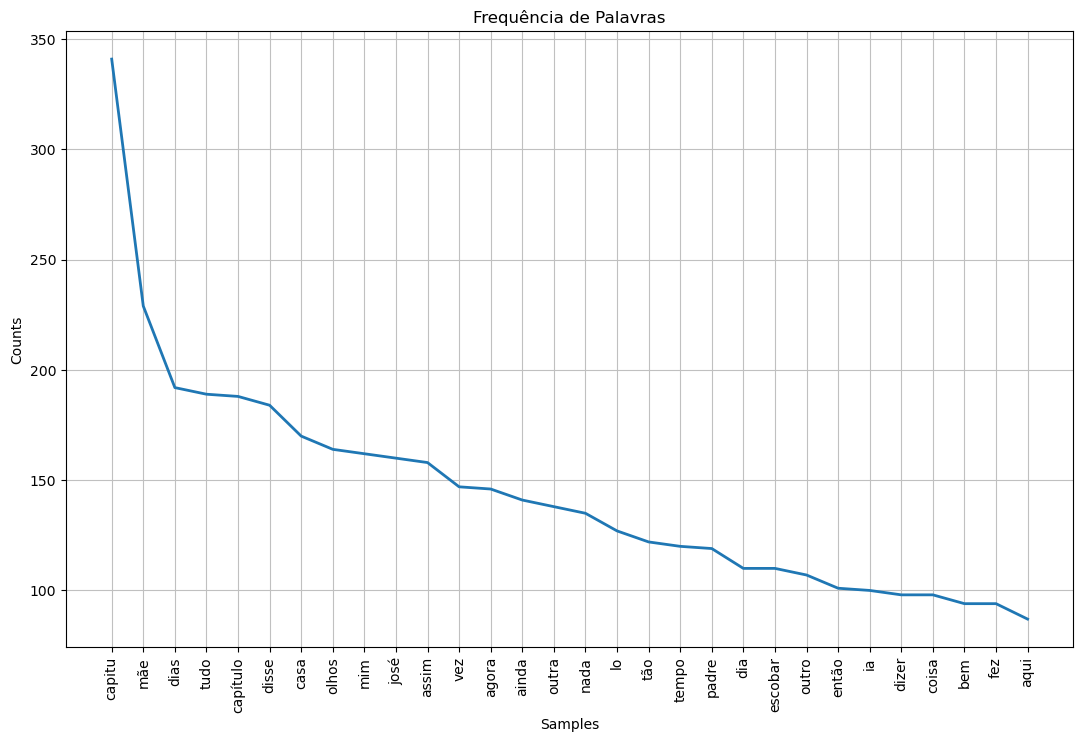

In [7]:
# contagem de frequencia
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# plot
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")
plt.show()

#### Lemmatização e Stemmatização

Ambas fazem a mesma coisa: Quando passado um texto como argumento, elas reduzem todas as formas conjugadas à sua raiz. A única diferença, entretanto, é que a função que lemmatiza seu texto reduz todos os verbos a forma verdadeira da raiz — por isso quanto maior seu texto, mais tempo essa função demora para rodar no código — , enquanto a função que stemmatiza apenas “corta” as palavras no meio usando a raiz como base, o que pode gerar palavras que não existem.

In [8]:
# stemmatizando com Lancaster
lancaster = nltk.LancasterStemmer()
[lancaster.stem(t) for t in tokens]

['rom',
 'dom',
 'casmurro',
 'dom',
 'casmurro',
 'texto',
 'referênc',
 'obra',
 'completa',
 'machado',
 'ass',
 'vol',
 'i',
 'nov',
 'aguil',
 'rio',
 'janeiro',
 'publicado',
 'origin',
 'editor',
 'garny',
 'rio',
 'janeiro',
 'capítulo',
 'primeiro',
 'título',
 'noit',
 'desta',
 'vindo',
 'cidad',
 'engenho',
 'novo',
 'encontre',
 'trem',
 'cent',
 'rapaz',
 'aqu',
 'bairro',
 'conheço',
 'vist',
 'chapéu',
 'cumprimentou',
 'sentou',
 'pé',
 'mim',
 'falou',
 'lua',
 'ministro',
 'acabou',
 'recitando',
 'verso',
 'viagem',
 'curt',
 'verso',
 'pod',
 'inteira',
 'mau',
 'sucedeu',
 'porém',
 'cansado',
 'feche',
 'olho',
 'três',
 'quatro',
 'vez',
 'tanto',
 'bastou',
 'interrompess',
 'leitur',
 'metess',
 'verso',
 'bolso',
 'continu',
 'diss',
 'acordando',
 'acabe',
 'murmurou',
 'bonito',
 'vi',
 'faz',
 'gesto',
 'tirá',
 'los',
 'outr',
 'vez',
 'bolso',
 'passou',
 'gesto',
 'amuado',
 'dia',
 'seguint',
 'entrou',
 'diz',
 'mim',
 'nom',
 'feio',
 'acabou',
 'alc

In [9]:
# stemmatizando com Porter
porter = nltk.PorterStemmer()
[porter.stem(t) for t in tokens]

['romanc',
 'dom',
 'casmurro',
 'dom',
 'casmurro',
 'texto',
 'referência',
 'obra',
 'completa',
 'machado',
 'assi',
 'vol',
 'i',
 'nova',
 'aguilar',
 'rio',
 'janeiro',
 'publicado',
 'originalment',
 'editora',
 'garnier',
 'rio',
 'janeiro',
 'capítulo',
 'primeiro',
 'título',
 'noit',
 'desta',
 'vindo',
 'cidad',
 'engenho',
 'novo',
 'encontrei',
 'trem',
 'central',
 'rapaz',
 'aqui',
 'bairro',
 'conheço',
 'vista',
 'chapéu',
 'cumpriment',
 'sentou',
 'pé',
 'mim',
 'falou',
 'lua',
 'ministro',
 'acab',
 'recitando',
 'verso',
 'viagem',
 'curta',
 'verso',
 'pode',
 'inteirament',
 'mau',
 'sucedeu',
 'porém',
 'cansado',
 'fechei',
 'olho',
 'trê',
 'quatro',
 'veze',
 'tanto',
 'bastou',
 'interrompess',
 'leitura',
 'metess',
 'verso',
 'bolso',
 'continu',
 'diss',
 'acordando',
 'acabei',
 'murmur',
 'bonito',
 'vi',
 'fazer',
 'gesto',
 'tirá',
 'lo',
 'outra',
 'vez',
 'bolso',
 'passou',
 'gesto',
 'amuado',
 'dia',
 'seguint',
 'entrou',
 'dizer',
 'mim',
 '

In [10]:
# lemmatizando com wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['romance',
 'dom',
 'casmurro',
 'dom',
 'casmurro',
 'texto',
 'referência',
 'obras',
 'completas',
 'machado',
 'assis',
 'vol',
 'i',
 'nova',
 'aguilar',
 'rio',
 'janeiro',
 'publicado',
 'originalmente',
 'editora',
 'garnier',
 'rio',
 'janeiro',
 'capítulo',
 'primeiro',
 'título',
 'noite',
 'destas',
 'vindo',
 'cidade',
 'engenho',
 'novo',
 'encontrei',
 'trem',
 'central',
 'rapaz',
 'aqui',
 'bairro',
 'conheço',
 'vista',
 'chapéu',
 'cumprimentou',
 'sentou',
 'pé',
 'mim',
 'falou',
 'lua',
 'ministros',
 'acabou',
 'recitando',
 'verso',
 'viagem',
 'curta',
 'verso',
 'pode',
 'inteiramente',
 'maus',
 'sucedeu',
 'porém',
 'cansado',
 'fechei',
 'olhos',
 'três',
 'quatro',
 'vezes',
 'tanto',
 'bastou',
 'interrompesse',
 'leitura',
 'metesse',
 'verso',
 'bolso',
 'continue',
 'disse',
 'acordando',
 'acabei',
 'murmurou',
 'bonito',
 'vi',
 'fazer',
 'gesto',
 'tirá',
 'los',
 'outra',
 'vez',
 'bolso',
 'passou',
 'gesto',
 'amuado',
 'dia',
 'seguinte',
 'ent

#### Concordância

Essa função serve para nos mostrar em quais contextos determinada palavra aparece, ela nos retorna o contexto que cerca o argumento. Isso é feito colando a palavra no centro das frases onde ela tende a aparecer através da função .concordance, que por sua vez recebe a palavra como argumento.

In [11]:
dom_casmurro = nltk.Text(word_tokenize(texto))
dom_casmurro.concordance('capitu')

Displaying 25 of 341 matches:
asta idade bentinho mal quinze anos capitu fez quatorze semana passada dois cr
oisa brincadeira arranjávamos altar capitu servia sacristão alterávamos ritual
e viva ar mesma opinião então amava capitu capitu mim realmente andava cosido 
ar mesma opinião então amava capitu capitu mim realmente andava cosido saias o
retanto matéria conversações sempre capitu chamava vezes bonito mocetão flor o
indíssimos fazer dizia lindos então capitu abanava cabeça grande expressão des
ia alguma frase algum gesto contava capitu dia notou diferença dizendo bonitos
fenômeno recente acordar pensamento capitu escutá la memória estremecer ouvia 
ndade demais virtudes eternas amava capitu capitu amava pernas andavam desanda
emais virtudes eternas amava capitu capitu amava pernas andavam desandavam est
naturalmente primeira capítulo xiii capitu repente ouvi bradar voz dentro casa
ente ouvi bradar voz dentro casa pé capitu quintal mamãe outra vez casa vem cá
orta comunicação manda

#### Similaridade

Usando a função ‘similar’ temos uma lista de palavras que tendem a ocorrer no mesmo contexto. Nesse caso, o contexto são apenas as palavras que ocorrem frequentemente de qualquer lado da palavra.

In [12]:
dom_casmurro.similar('mãe')

mim falou tanto bolso outra assim fim seminário podia morreu estudante
importa súplicas saí


#### Bigramas

Encontrar bigramas é uma parte importante para a análise de um texto. Mas primeiro, o que são bigramas? São palavras no texto que possuem um sentido único estando juntas, podendo até ocorrer separadas, mas com um sentido quando juntas. Por exemplo, nomes compostos (João Alfredo, Maria Júlia) ou nomes de cidades (São Paulo, Rio de Janeiro, Nova Iorque) são exemplos claros de bigramas, essas palavras podem ocorrer sozinhas, mas ocorrendo juntas possuem um significado.

Para encontrar os bigramas de um texto com NLTK, basta chamar a função ‘collocations’:

In [13]:
dom_casmurro.collocations() 

josé dias; prima justina; tio cosme; mata cavalos; padre cabral; outra
vez; alguma coisa; alguns instantes; outra coisa; muita vez; dia
seguinte; engenho novo; rio janeiro; dom casmurro; protonotário
apostólico; tique tique; ave marias; mana glória; oblíqua dissimulada;
quinze anos


#### Gráfico de dispersão

Essa função serve para analisar a ocorrência das palavras ao longo de todo o texto — no nosso caso, do livro — e mostra nos riscos do eixo horizontal quando essa palavra tende a ocorrer nele

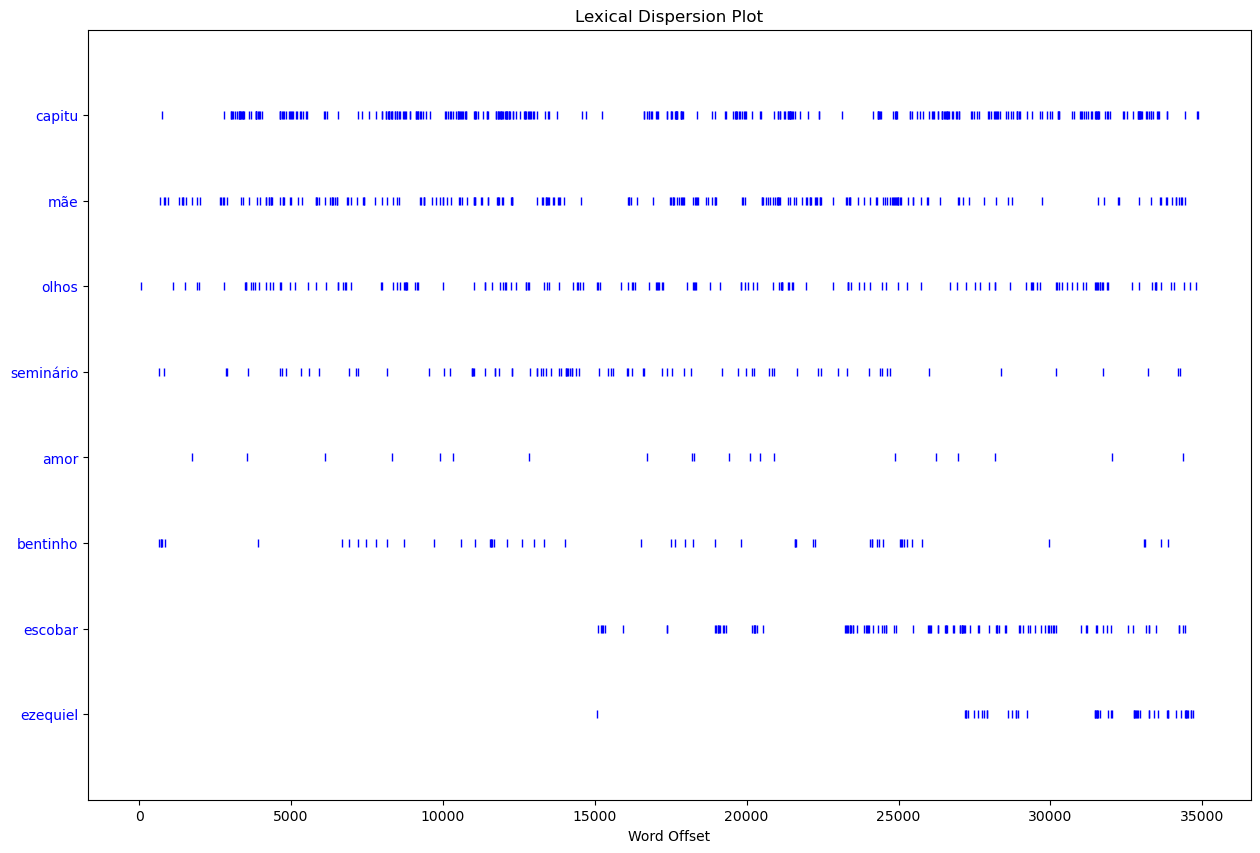

In [14]:
plt.figure(figsize=(15, 10))
dom_casmurro.dispersion_plot(['capitu', 'mãe', 'olhos', 
                              'seminário', 'amor', 'bentinho', 'escobar','ezequiel'])


### Spacy

Spacy é uma biblioteca para Processamento de Linguagem Natural desenvolvida principalmente para ajudar desenvolvedores a construir projetos de forma rápida e prática. Nela, podemos encontrar várias features interessantes para trabalhar com NLP, como tokenizador, POS-tagger, NER, word vectors pré-treinados, dentre outras coisas.

In [15]:
# !pip install spacy
# !python -m spacy download pt_core_news_sm

import spacy

nlp = spacy.load("pt_core_news_sm")

In [16]:
from spacy.lang.pt.examples import sentences

# Alguns exemplos fornecidos pela própria biblioteca
for s in sentences:
    print(s, '\n')

Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares 

Carros autônomos empurram a responsabilidade do seguro para os fabricantes.São Francisco considera banir os robôs de entrega que andam pelas calçadas 

Londres é a maior cidade do Reino Unido 



In [17]:
# Criando o objeto spacy
doc = nlp(sentences[0])
print(doc.text)

Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares


#### Tokenização

In [18]:
for token in doc:
    print(token.text)

Apple
está
querendo
comprar
uma
startup
do
Reino
Unido
por
100
milhões
de
dólares


#### Lematização

In [19]:
for token in doc:
    print(token.text, token.lemma_)

Apple Apple
está estar
querendo querer
comprar comprar
uma um
startup startup
do de o
Reino Reino
Unido Unido
por por
100 100
milhões milhão
de de
dólares dólar


#### NER - Named Entity Recognition

In [20]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
Reino Unido LOC


#### Part-of-speech (POS) Tagging

In [21]:
for token in doc:
    print(token.text, token.pos_)

Apple PROPN
está AUX
querendo VERB
comprar VERB
uma DET
startup NOUN
do ADP
Reino PROPN
Unido PROPN
por ADP
100 NUM
milhões NUM
de ADP
dólares NOUN


#### Dependency Parsing

In [22]:
for token in doc:
    print(token.text, "-->", token.dep_)

Apple --> nsubj
está --> aux
querendo --> ROOT
comprar --> xcomp
uma --> det
startup --> obj
do --> case
Reino --> nmod
Unido --> flat:name
por --> case
100 --> obl
milhões --> flat
de --> case
dólares --> nmod


In [23]:
from spacy import displacy
displacy.render(doc)

In [24]:
texto =  'A Comissão de Julgamento pode, a seu exclusivo critério, solicitar os originais de quaisquer \ndocumentos apresentados, se julgar necessário.'
teste = nlp(texto)
displacy.render(teste)

### Enelvo

A biblioteca Enelvo é muito importante para diversas tarefas de Processamento de Linguagem Natural em português porque possui a capacidade de normalizar textos, ou seja, corrige abreviações, gírias, erros ortográficos, capitaliza letras no começo das frases, de nomes próprios e acrônimos. Ela também possui uma função própria para remover pontuações e emojis.

In [ ]:
# !pip install enelvo

#### Normalizador

In [25]:
# importando
from enelvo.normaliser import Normaliser

# instanciando
norm = Normaliser(tokenizer='readable')

msg = 'Até hj vc n me respondeu. Oq aconteceu?'
resposta = norm.normalise(msg)
print(resposta)      

até hoje você não me respondeu . o que aconteceu ?


#### Capitalizar nomes próprios, acrônimos e primeiras palavras na frase

In [26]:
# capitaliza nomes próprios
cap_pns = Normaliser(capitalize_pns=True)

# capitaliza acrônimos
cap_acs = Normaliser(capitalize_acs=True)

# capitaliza começos de frases
caps_inis = Normaliser(capitalize_inis=True)

#### Remove pontuações e emojis

In [27]:
# remove pontuações e emojis
sanitizer = Normaliser(sanitize=True)

Por fim, para criar um normalizador que realiza todas essas funções, basta passar todos os argumentos juntos:



In [28]:
normalizador = Normaliser(tokenizer='readable', capitalize_inis=True, 
                          capitalize_pns=True, capitalize_acs=True, 
                          sanitize=True)

msg = 'a maria foi ao shopp pq estava trsite, acho q hj foi uma dia dificiu'
resposta = normalizador.normalise(msg)
print(resposta)

A Maria foi ao shopping porque estava triste acho que hoje foi uma dia difícil


### NILC USP

O NILC (Núcleo Institucional de Linguística Computacional) é um grupo originário da USP São Carlos e seus projetos e pesquisas englobam diferentes áreas de NLP, como tradução automática, sumarização de texto, criação de léxicos e dicionários, etc.

Dentre esses recursos, o NILC dispõe de um repositório de embeddings treinados em português a partir de dezessete corpus, totalizando 1,395,926,282 tokens. Esses embeddings são disponibilizados em várias dimensões diferentes e seus treinamentos são feitos em algoritmos como Word2Vec, FastText, Wang2Vec e Glove.

Assim que você tiver feito o download dos embeddings escolhidos, para utilizá-los com o gensim, basta rodar o seguinte:

In [ ]:
#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format('skip_s600.txt')

# Procurando pelas palavras mais similares
#model.most_similar('brasil')

### BERTimbau

De uma maneira resumida, O BERT (Bidirectional Encoder Representations from Transformers), criado pela Google AI em 2018, aplica um treinamento bidirecional em uma arquitetura de Transformers para treinar um modelo de língua. Com isso, o modelo consegue aprender relações contextuais entre as palavras de um texto.

Para usarmos o BERT pré-treinado em português, temos o BERTimbau, modelo treinado pela NeuralMind, que fornece dois modelos: o BERT Base e o BERT Large. Podemos acessá-lo através da própria biblioteca do Hugging Face dessa forma:

In [ ]:
# !pip install transformers
#from transformers import AutoModel, AutoTokenizer

# BERT Base
#tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
#model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

# BERT Large
#tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased')
#model = AutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased')